MAE: 63.46662202705408
R² : 0.892840696923938


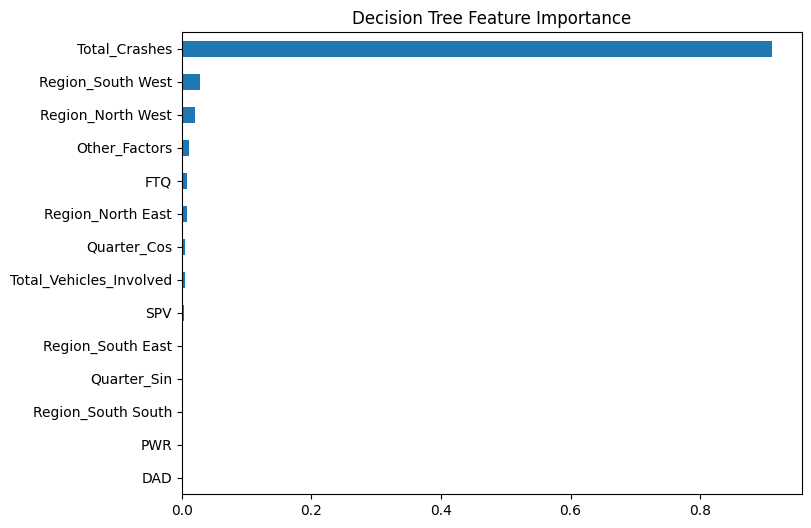

In [1]:
# All steps in one block
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv('Nigeria Crash Data P.csv')

features = [
    'Total_Crashes', 'Total_Vehicles_Involved',
    'SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors',
    'Quarter_Sin', 'Quarter_Cos',
    'Region_North East', 'Region_North West',
    'Region_South East', 'Region_South South', 'Region_South West'
]

X = df[features]
y = df['Total_Casualties']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R² :', r2_score(y_test, y_pred))

# Feature importance
pd.Series(dt.feature_importances_, index=features).sort_values().plot.barh(figsize=(8,6))
plt.title('Decision Tree Feature Importance')
plt.show()